<a href="https://colab.research.google.com/github/SeikyoApp/my-repo/blob/main/ClinicalTrials_gov_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考サイト：https://clinicaltrials.gov/data-api/about-api/api-migration#other-all-api-xml

In [ ]:
import requests
import pandas as pd
from IPython.display import display

# ✅ API のエンドポイント
BASE_URL = "https://clinicaltrials.gov/api/v2/studies"

# ✅ 正しいフィールドリスト（コメントアウトで簡単に制御）
fields_list = [
    "NCTId",
    "BriefTitle",
    "OfficialTitle",  # 基本情報
    "OverallStatus",
    "Phase",  # 試験の状態
    "StartDate",
    "PrimaryCompletionDate",
    "CompletionDate",  # 期間情報
    "EnrollmentCount",
    "EligibilityCriteria",
    "Gender",
    "MinimumAge",
    "MaximumAge",  # 参加条件
    "StudyType",
    "InterventionType",
    "InterventionName",  # 研究タイプ & 介入情報
    "LocationCountry",
    "LocationCity",
    "LocationFacility",  # 実施場所情報
    "HasResults",
    "ResultsFirstPostDate",  # 試験結果情報
    "LeadSponsorName",
    "Collaborator"  # スポンサー情報
]

params = {
    "query.term": "heart disease",
    "pageSize": 10,  # まずは 10 件取得
    "fields": ",".join(fields_list)
}

response = requests.get(BASE_URL, params=params, headers={"Accept": "application/json"})

if response.status_code == 200:
    data = response.json()

    print("📌 APIレスポンスの一部を確認:")
    print(data)  # レスポンスデータ全体を確認

    studies = data.get("studies", [])

    if not studies:
        print("⚠️ 取得データが空です！検索条件を変えて試してください。")
    else:
        extracted_data = []
        for study in studies:
            extracted_data.append({
                "NCTId": study["protocolSection"]["identificationModule"].get("nctId", "N/A"),
                "BriefTitle": study["protocolSection"]["identificationModule"].get("briefTitle", "N/A"),
                "OverallStatus": study["protocolSection"]["statusModule"].get("overallStatus", "N/A"),
                "Phase": study["protocolSection"]["designModule"].get("phases", ["N/A"])[0],  # フェーズはリスト
                "StartDate": study["protocolSection"]["statusModule"].get("startDateStruct", {}).get("date", "N/A"),
                "CompletionDate": study["protocolSection"]["statusModule"].get("completionDateStruct", {}).get("date", "N/A"),
                "EnrollmentCount": study["protocolSection"]["designModule"].get("enrollmentInfo", {}).get("count", "N/A"),
                "LeadSponsorName": study["protocolSection"]["sponsorCollaboratorsModule"]["leadSponsor"].get("name", "N/A"),
            })

        df = pd.DataFrame(extracted_data)
        display(df)

else:
    print(f"❌ APIリクエストエラー: {response.status_code}")
    print(response.text)

📌 APIレスポンスの一部を確認:
{'studies': [{'protocolSection': {'identificationModule': {'nctId': 'NCT03437876', 'briefTitle': 'Study on Effect of Intestinal Microbiota Transplantation in Hepatitis B Virus Induced Cirrhosis', 'officialTitle': 'A Randomised Study on Intestinal Microbiota Transplantation for Hepatitis B Virus Induced Cirrhosis'}, 'statusModule': {'overallStatus': 'UNKNOWN', 'startDateStruct': {'date': '2016-10-31'}, 'primaryCompletionDateStruct': {'date': '2020-11'}, 'completionDateStruct': {'date': '2020-12'}}, 'sponsorCollaboratorsModule': {'leadSponsor': {'name': 'Zhongshan Hospital Xiamen University'}}, 'designModule': {'studyType': 'INTERVENTIONAL', 'phases': ['NA'], 'enrollmentInfo': {'count': 60}}, 'armsInterventionsModule': {'interventions': [{'type': 'OTHER', 'name': 'intestinal microbiota transplant'}]}, 'eligibilityModule': {'eligibilityCriteria': 'Inclusion Criteria:\n\n* Written informed consent/assent as appropriate, able to keep treatment\n* 18 to 50 years of age\n* C

,NCTId,BriefTitle,OverallStatus,Phase,StartDate,CompletionDate,EnrollmentCount,LeadSponsorName
0,NCT03437876,Study on Effect of Intestinal Microbiota Trans...,UNKNOWN,NA,2016-10-31,2020-12,60,Zhongshan Hospital Xiamen University
1,NCT00252876,GALLEX 1 - Long Term Extension Study in Patien...,TERMINATED,PHASE3,2005-03,2007-01,2000,AstraZeneca
2,NCT06621576,First-in-Human Pilot Study of Epicardial Circu...,ACTIVE_NOT_RECRUITING,EARLY_PHASE1,2024-09-18,2025-09,3,Ruijin Hospital
3,NCT02312076,GnRHa for Luteal Phase Support in Long GnRHa P...,RECRUITING,PHASE4,2016-09-09,2024-12-31,200,Mansoura University
4,NCT05125276,Less Bleeding by Omitting Aspirin in Non-ST-se...,RECRUITING,PHASE4,2022-05-13,2025-07,3090,Academisch Medisch Centrum - Universiteit van ...
5,NCT03870776,RESIST : Administration of MAP4343 in Antidepr...,ACTIVE_NOT_RECRUITING,PHASE2,2019-06-01,2025-03-01,110,Mapreg
6,NCT05612776,HIIT vs HRV-based Training for Rehabilitation ...,UNKNOWN,NA,2022-12-01,2023-12-01,60,Universidad de Almeria
7,NCT06655376,Aspirin and Hemocompatibility Events in Chroni...,RECRUITING,PHASE4,2024-10-02,2027-04-01,128,Columbia University
8,NCT03894176,Association of Plasma PTX3 Concentration and O...,COMPLETED,N/A,2018-01-01,2018-09-02,335,Indonesian Cardiovascular Research Center
9,NCT05836376,Is Mitral Annuloplasty an Effective Treatment ...,COMPLETED,N/A,2020-11-30,2020-12-02,55,Michele De Bonis


In [ ]:
print(df.head)  # 取得したデータをそのまま確認

<bound method NDFrame.head of          NCTId                                         BriefTitle  \
0  NCT03437876  Study on Effect of Intestinal Microbiota Trans...   
1  NCT00252876  GALLEX 1 - Long Term Extension Study in Patien...   
2  NCT06621576  First-in-Human Pilot Study of Epicardial Circu...   
3  NCT02312076  GnRHa for Luteal Phase Support in Long GnRHa P...   
4  NCT05125276  Less Bleeding by Omitting Aspirin in Non-ST-se...   
5  NCT03870776  RESIST : Administration of MAP4343 in Antidepr...   
6  NCT05612776  HIIT vs HRV-based Training for Rehabilitation ...   
7  NCT06655376  Aspirin and Hemocompatibility Events in Chroni...   
8  NCT03894176  Association of Plasma PTX3 Concentration and O...   
9  NCT05836376  Is Mitral Annuloplasty an Effective Treatment ...   

           OverallStatus         Phase   StartDate CompletionDate  \
0                UNKNOWN            NA  2016-10-31        2020-12   
1             TERMINATED        PHASE3     2005-03        2007-01   
2  

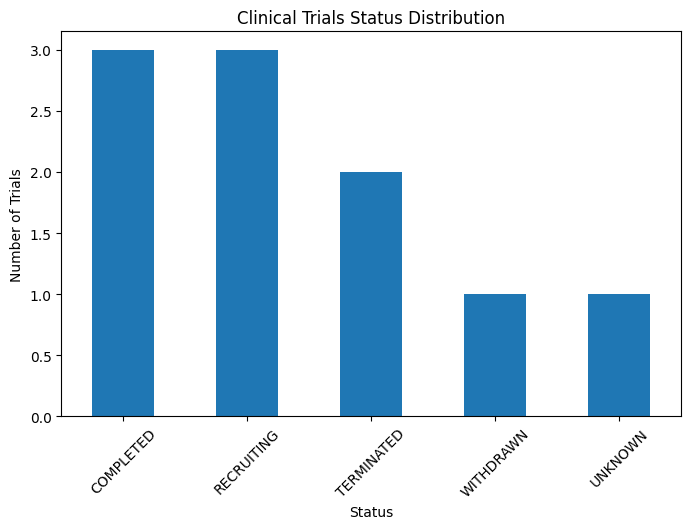

In [ ]:
import matplotlib.pyplot as plt

# ステータスごとのカウント
status_counts = df["OverallStatus"].value_counts()

# グラフ作成
plt.figure(figsize=(8, 5))
status_counts.plot(kind="bar")
plt.title("Clinical Trials Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.show()


In [ ]:
GET /api/query/full_studies